In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='Arial') # fonts 오류 문제

회귀분석(regression analysis)  
- Gradient Descent

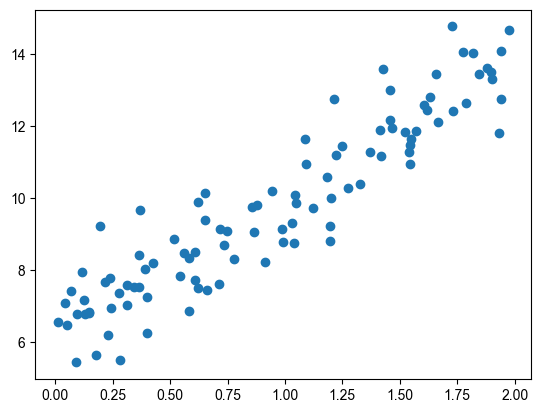

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
# y=4X+6식을 근사(w1=4,w=0.6). random. 값은 noise를 위해 만듦.
X = 2*np.random.rand(100,1)
y = 6+4*X+np.random.randn(100,1)

#X,y 데이터 셋 scatter plot으로 시각화
plt.scatter(X,y)

In [3]:
#w1과 w0를 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X,y,learning_rate=0.01):
    N=len(y) #y = w_0+w1*x1
    #먼저 w1_update,w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1) # 벡터크기에 따라서 0 mapping시켜줘.
    w0_update = np.zeros_like(w0)
    #예측 배열 계산하고 예측과 실제 값의 차이 계산.
    y_pred = np.dot(X,w1.T) +w0 # np.matmul써도 되지만, 어차피 벡터 계산이기 때문에 dot를 씀
    #y=ax+b -> np.dot(X,w1.T)
    diff = y-y_pred # error function = (실제값-에측값)

    #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성.
    w0_factors = np.ones((N,1)) #초기값 ones로 셋팅 N크기만큼 받아들이고,

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff)) # error ftn : mse(mean square error)
    #/summation_i^n (y-y_hat)(-x_i)
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff)) # summation_i^n (y-y_hat)(-x_1)
    
    return w1_update, w0_update #W_0,W_1 update

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X,y,iters=10000):
    #w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    #인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출하여 w1,w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0, X,y, learning_rate=0.01)
        #learning_rate ->hyperparameter(사람이 정하는 파라미터, 정해져 있지 않음.)
        # 보통 10^(-2) ~ 10^(-6) 절대적으로 정해져 있진 않음.
        w1 = w1-w1_update #w1(왼쪽에 있는)->new, w1(오른쪽에 있는) ->old
        #w1_update = gradient descent 방법
        #new = old-update(update=0 -> new=old) #최적의 값을 찾음.
        w0 = w0-w0_update
    return w1,w0

In [5]:
def get_cost(y, y_pred):
    N=len(y)
    cost = np.sum(np.square(y-y_pred))/N
    print(cost)
    return cost

In [6]:
w1,w0 = gradient_descent_steps(X,y,iters=1000) #1000번을 반복
#최적의 값을 뽑고 그때의 cost값을 출력
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * X +w0
print('Gradient Descent Total cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:3.818 w0:6.161
0.8074693923777707
Gradient Descent Total cost:0.8075


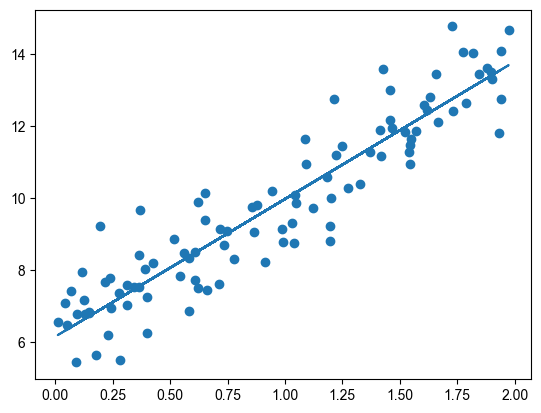

In [7]:
plt.scatter(X,y)
plt.plot(X,y_pred)

data가 적으면 gradient descent 방법을 사용할텐데, data가 굉장히 큼.
-> 미분자체가 계산량이 많아짐 / 변수가 많아서 미분이 많아짐

통계에서는 모집단(전체) -> 표본(sample) 통계량 혹은 결론

stochastic

In [8]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장 (참고 : https://medium.com/@shistory02/numpy-permutation-vs-shuffle-34fe56f0c246)
        # Stochastic gradient descent / Mini-batch graident descent (참고 : https://nonmeyet.tistory.com/entry/Batch-MiniBatch-Stochastic-%EC%A0%95%EC%9D%98%EC%99%80-%EC%84%A4%EB%AA%85-%EB%B0%8F-%EC%98%88%EC%8B%9C)
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [9]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 3.817 w0: 6.149
0.8078331972015786
Stochastic Gradient Descent Total Cost:0.8078


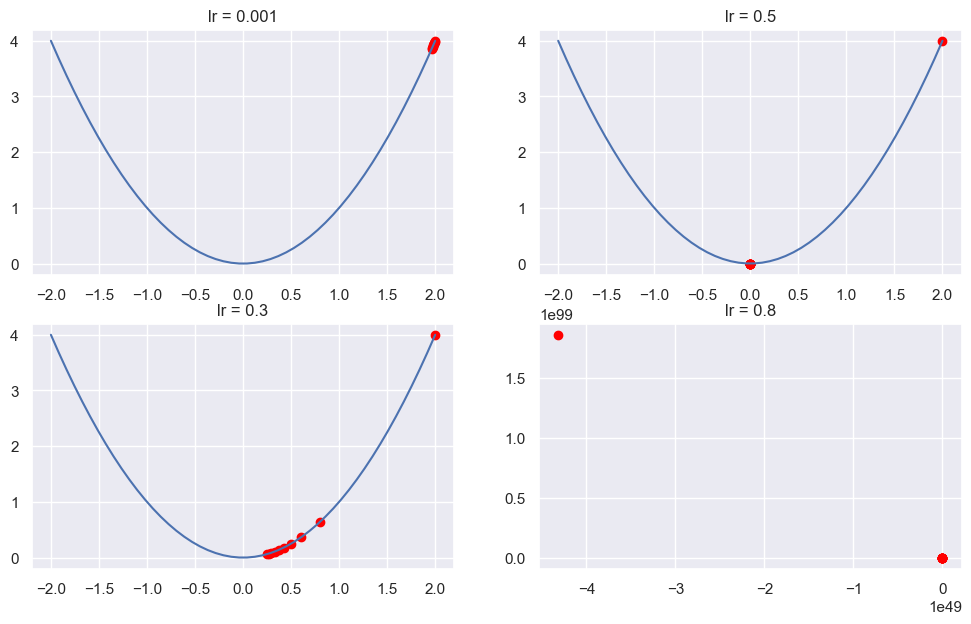

In [12]:
# 보폭에 따른 결과를 보려고 함.
import numpy as np
import matplotlib.pyplot as plt

lr_list = [0.001, 0.5, 0.3, 0.8]

def get_derivative(lr_list):

  w_old = 2
  derivative = [w_old]

  y = [w_old ** 2] # 손실 함수를 y = x^2로 정의함.

  for i in range(1,10):
    #먼저 해당 위치에서 미분값을 구함

    dev_value = w_old **2

    #위의 값을 이용하여 가중치를 업데이트
    w_new = w_old - lr * dev_value
    w_old = w_new

    derivative.append(w_old) #업데이트 된 가중치를 저장 함,.
    y.append(w_old ** 2) #업데이트 된 가중치의 손실값을 저장 함.

  return derivative, y

x = np.linspace(-2,2,50) 
x_square = [i**2 for i in x]

fig = plt.figure(figsize=(12, 7))

for i,lr in enumerate(lr_list):
  derivative, y =get_derivative(lr)
  ax = fig.add_subplot(2, 2, i+1)
  ax.scatter(derivative, y, color = 'red')
  ax.plot(x, x_square)
  ax.title.set_text('lr = '+str(lr))

plt.show()

## Sklearn 데이터셋 활용  

Bulid-in dataset

- load_boston: 보스톤 집값 데이터  
- load_iris: 아이리스 붓꽃 데이터  
- load_diabetes: 당뇨병 환자 데이터  
- load_digits: 손글씨 데이터  
- load_linnerud: multi-output regression 용 데이터  
- load_wine: 와인 데이터  
- load_breast_cancer: 위스콘신 유방암 환자 데이터

In [13]:
import sklearn
print(sklearn.__version__)

1.0.2


In [14]:
# !pip uninstall scikit-learn
# !pip install scikit-learn==1.0.2

In [15]:
import site
site.getsitepackages()

['c:\\Users\\5\\AppData\\Local\\Programs\\Python\\Python39',
 'c:\\Users\\5\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages']

In [16]:
import numpy as np
import pandas as pd
#Visualization Libraries
import seaborn as sns
#seaborn : 그래프를 통계적으로 그리는 패키지.
import matplotlib.pyplot as plt
# imoprt package
#->함수를 몽땅 가지고 오는 것,
#from package imoprt module
# 패키지안에서 특정함수를 딸랑만 가지고 오는것.
from sklearn import datasets
from sklearn.linear_model import LinearRegression
#from sklearn.-> .은 속성으로 들어가주세요!~
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
#To plot the graph embedded in the note book
%matplotlib inline

In [17]:
#loading the dataset direclty from sklearn
#import sklearn
#boston = sklearn.datasets.load_boston()
boston = datasets.load_boston()

c:\Users\5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

In [18]:
print(type(boston))
print('\n') #엔터쳐주세요.
print(boston.keys())
print('\n')
print(boston.data.shape)
print('\n') #엔터키를 치시오. print('\t') -> tab으로 띄어주세요.
print(boston.feature_names)

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


(506, 13)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [25]:
bos = pd.DataFrame(boston.data, columns = boston.feature_names) 
#행과 열을 접근하기 위해서
bos['PRICE'] = boston.target
print(bos.head()) #위애서 ()면, 갯수가 보임. default=다섯개
print(bos.tail()) #밑에서 다섯개.

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX   
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0  \
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX   
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0  \
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3

In [26]:
bos.isnull().sum() #결측치 확인
#bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [28]:
bos.describe() # 요약통계량

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [27]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


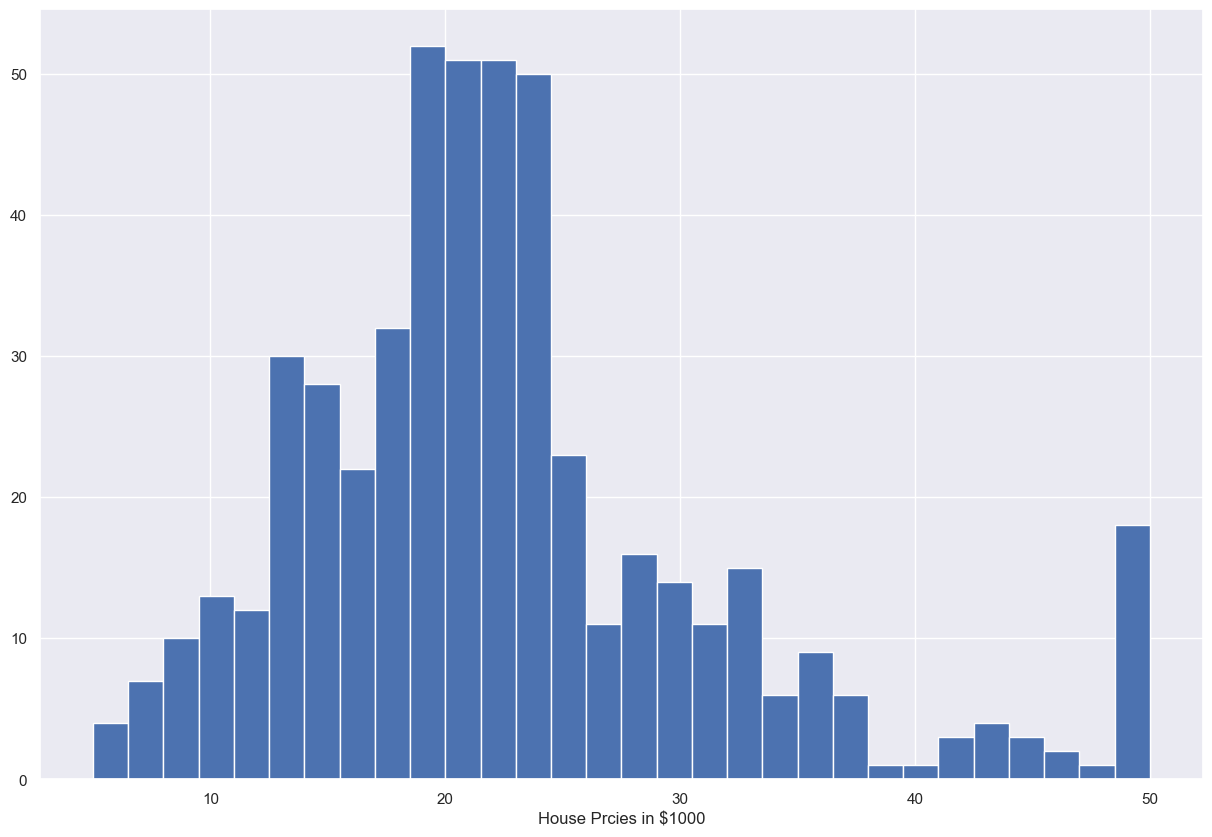

In [29]:
import seaborn as sns
sns.set(rc={'figure.figsize' : (15,10)}) #Price에 대해 그림을 그림.
#figure.figsize : 크기를 어떻게 할꺼냐?
plt.hist(bos['PRICE'],bins=30) # .hist -> 히스토그램을 하겠다. bins->막대가 몇 개냐?
plt.xlabel('House Prcies in $1000') #x축
plt.show() #그림을 그리시오.

<Axes: >

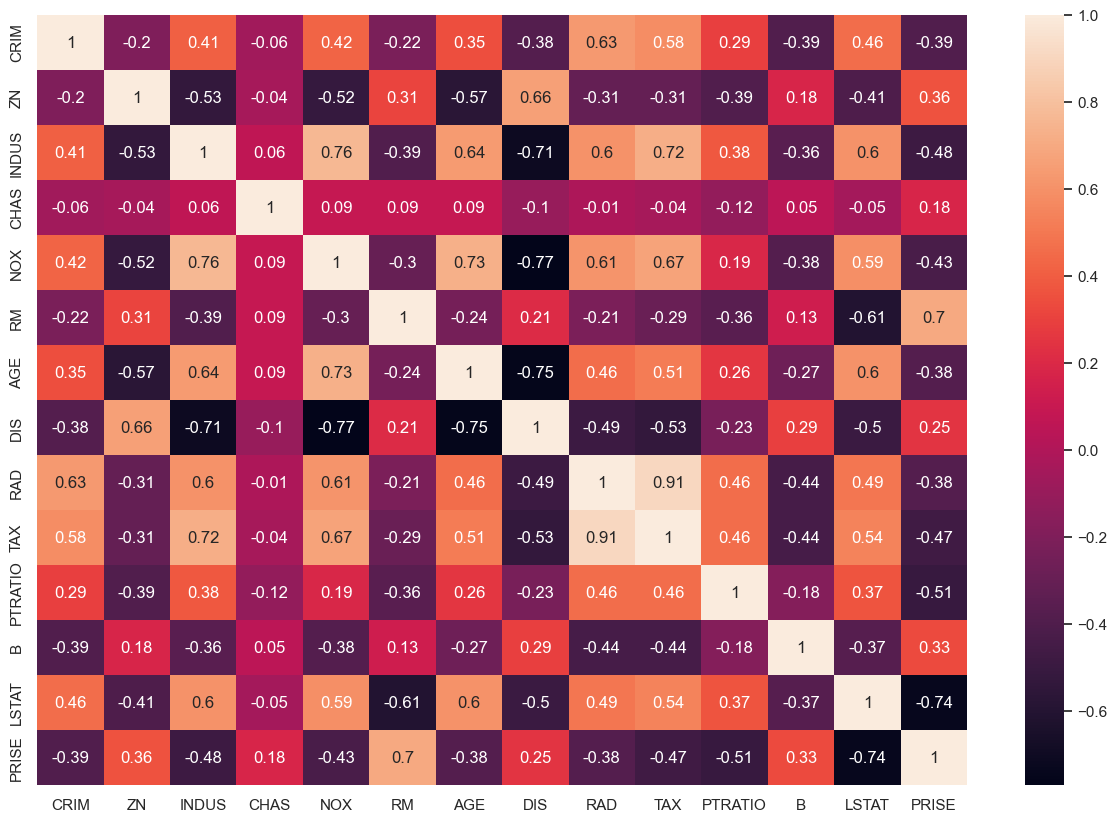

In [24]:
#Created a dataframe without the price col, since we need to see the correlation between the variables
# bos_1 = pd.DataFrame(boston.data, columns = boston.feature_names)

correlation_matrix = bos.corr().round(2) #상관계수를 계산해줘.
sns.heatmap(data=correlation_matrix, annot=True) 
#heatmap 관계가 높다는 검은색, 밝은색 -> 진한 색깔이면 관계가 높다. 
#annot->계산한값을 그림에 그려줘.


#다중공산성 문제를 확인한것(왜냐하면 타겟은 빠져있기 때문에.)

In [ ]:
bos.columns

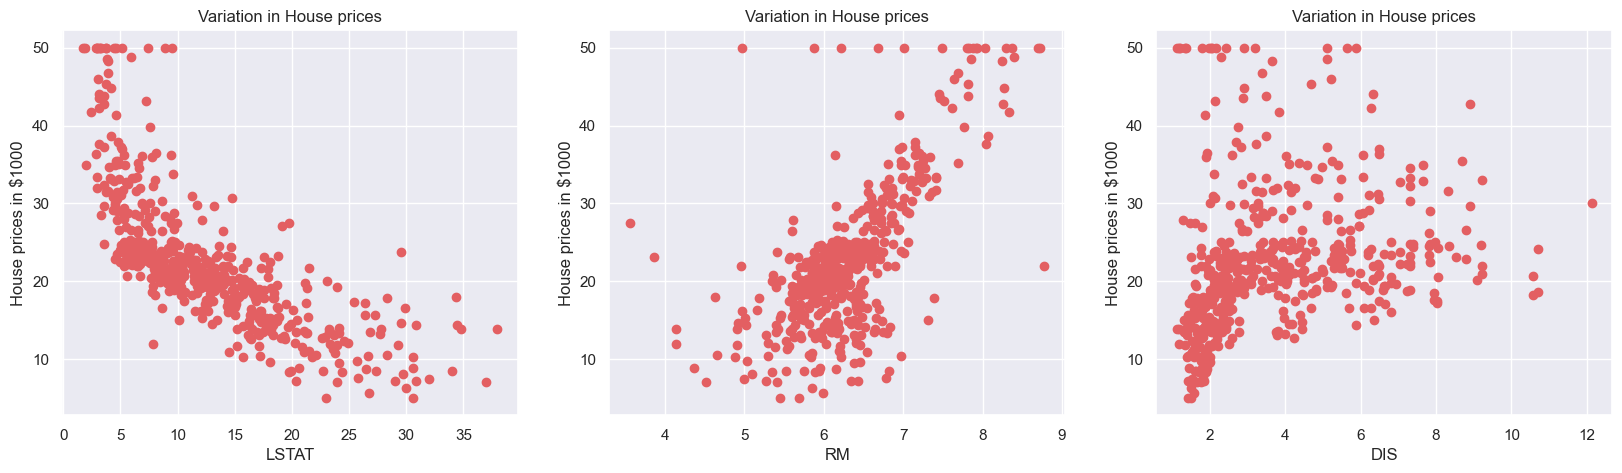

In [30]:
plt.figure(figsize=(20,5))

features = ['LSTAT','RM','DIS']
target = bos['PRICE']

for i,col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x = bos[col]
    y = target
    plt.scatter(x,y,marker='o', color='#e35f62')
    plt.title('Variation in House prices')
    plt.xlabel(col)
    plt.ylabel('House prices in $1000')    

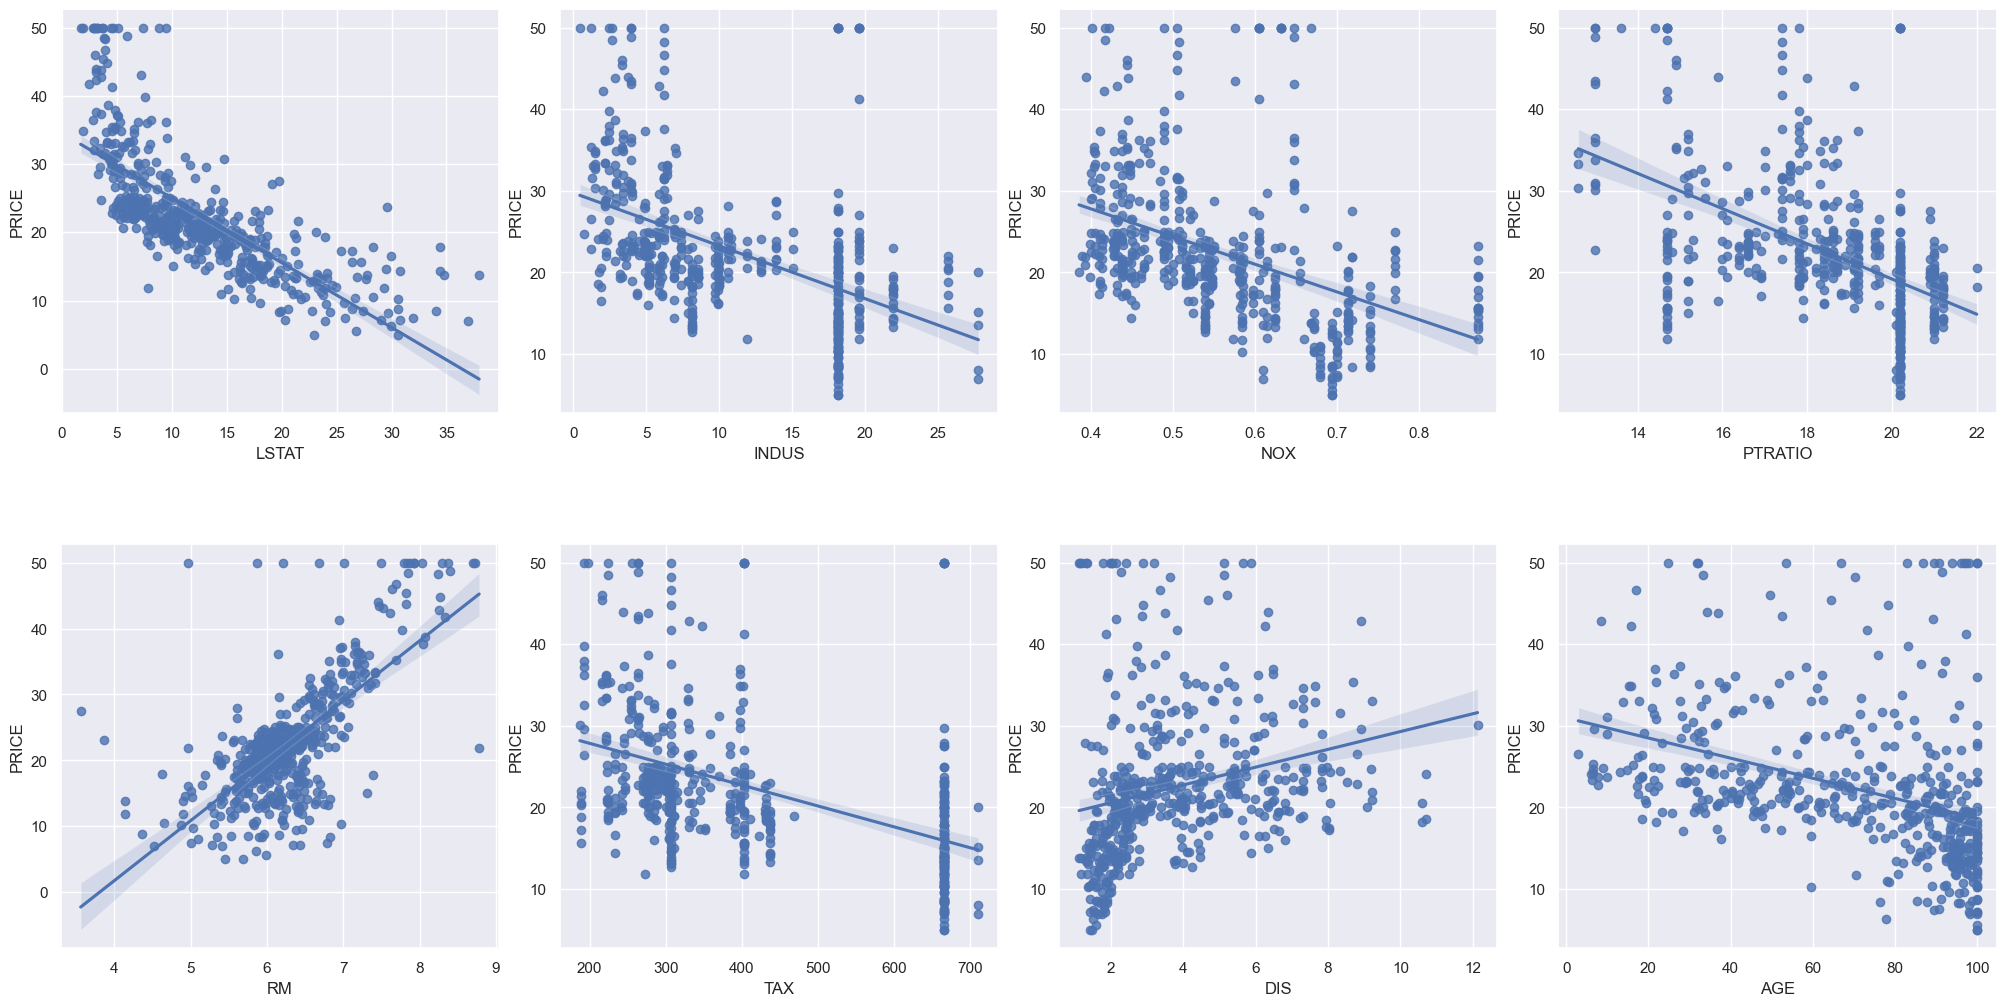

In [31]:
columns_sels = ['LSTAT','INDUS','NOX','PTRATIO','RM','TAX','DIS','AGE']
x=bos.loc[:,columns_sels]
y=bos['PRICE']

fig,axes = plt.subplots(ncols=4,nrows=2,figsize=(20,10))
index=0
axes = axes.flatten()
for i,k in enumerate(columns_sels):
    sns.regplot(y=y, x=x[k], ax = axes[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [32]:
bos.RM.shape

(506,)

In [33]:
bos.PRICE.shape

(506,)

In [34]:
X_rooms = bos.RM
y_price = bos.PRICE

X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506, 1)


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_rooms,y_price, test_size=0.2, 
                                                 random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 1)
(404, 1)
(102, 1)
(102, 1)


Sklearn의 Linear regression 클래스
input parameter

fit_intercept : 불 값으로, default = True. Intercept(절편) 값을 계산할 것인지 말지를 지정함. 만일 False로 지정하면 Intercept가 사용되지 않고 0으로 지정됨.

normalize : 불 값으로, 디폴트는 False임. fit_intercept가 False 인 경우에는 이 파라미터가 무시됨. 만일 True이면 회귀를 수행하기 전에 입력 데이터 세트를 정규화 함

Features

coef_ : fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성. Shape는 (Target 값 개수, 피쳐 개수)

intercept_ : intercept 값

다중 공성선 문제(multicollinearity problem)
참고 : 선형 회귀분석의 4가지 기본가정(https://kkokkilkon.tistory.com/175)
선형회귀의 가정은 4가지 정도가 있다.

독립변수와 종속변수 간의 선형적인 관계를 가정한다.

오차항은 정규분포를 따른다는 가정이다. (Normality)

오차항은 등분산성을 가정한다.(Homoscedasticity)

공분산성이 없다는 가정이다. (no multicollinearity)

모형의 일부 설명 변수가 다른 설명 변수와 상관 정도가 높아, 데이터 분석 시 부정적인 영향을 미치는 현상을 말함.

-> 어처구니 없는 해석을 하게 만듬

피쳐 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해짐. 이러한 현상을 다중 공선성(Multi-collinearity)
RMSE(Root Mean Squared Error) :MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌움.
## $R^2 = {\dfrac {예측값 ~~~ Variance} {실제값~~~Varivance} } $